# NLP using SVM with PCA

# Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df  = pd.read_csv("Restaurant_Reviews.tsv",delimiter = '\t', quoting = 3)

In [19]:
print(df)
type(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


pandas.core.frame.DataFrame

# Checking for null values

In [4]:
df.isna()

,Review,Liked
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


# Text cleaning using NLTK (Bag Of Words)

In [20]:
import re                  
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
corpus = []                       
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = word_tokenize(review)
    words = stopwords.words('english')
    words.remove('not')
    words.remove('but')
    words.remove('is')
    words.remove('their')
    words.remove('you')
    words.remove('no')
    x=0
    while x<len(words):
        if words[x].endswith("n't"):
            words.remove(words[x])
        x+=1
    lm = WordNetLemmatizer()
    review = [lm.lemmatize(word) for word in review if not word in set(words)]
    review = ' '.join(review)
    corpus.append(review)

    

In [6]:
corpus[:30]

['wow loved place',
 'crust is not good',
 'not tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potato like rubber you could tell made ahead time kept warmer',
 'fry great',
 'great touch',
 'service prompt',
 'would not go back',
 'cashier no care ever say still ended wayyy overpriced',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked no sign indicate cash',
 'highly recommended',
 'waitress little slow service',
 'place is not worth time let alone vega',
 'not like',
 'burrittos blah',
 'food amazing',
 'service is also cute',
 'could care le interior is beautiful',
 'performed',
 'right red velvet cake ohhh stuff is good',
 'never brought salad asked',
 'hole wall great mexican street taco friendly staff',
 'took hour get food table restaurant food luke warm sever running around like totally overwhelmed',
 'w

# Feature Extraction

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1700)                
X = cv.fit_transform(corpus).toarray()                           
y = df.iloc[:,1].values
print(X)
len(X[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


1700

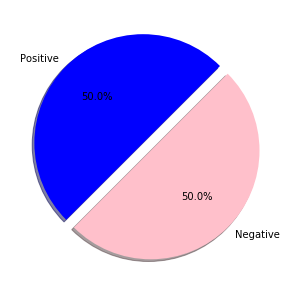

In [8]:
fig=plt.figure(figsize=(5,5))
colors=["blue",'pink']
pos=df[df['Liked']==1]
neg=df[df['Liked']==0]
ck=[pos['Liked'].count(),neg['Liked'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

# Training and testing the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 25)

# Standardizing the features

In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(X)

# Fitting a Predictive Model (SVM with PCA)


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel = 'poly',degree =1, random_state=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Comparing actual and predicted output

In [13]:
results = pd.DataFrame({
    'Actual': np.array(y_test).flatten(),
    'Predicted': np.array(y_pred).flatten(),
})
results[1:20]

,Actual,Predicted
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,1
9,0,0
10,0,0


# Calculating the acuracy

Test data Accuracy Score:  0.94
Train data Accuracy Score:  0.9463157894736842


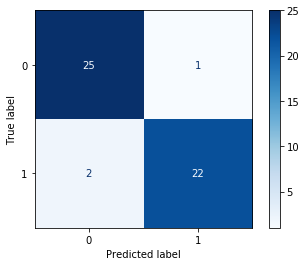

In [14]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(clf,X_test , y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred)
print('Test data Accuracy Score: ',accuracy)
accuracy = accuracy_score(y_train, y_train_pred)
print('Train data Accuracy Score: ',accuracy)